# Predicción del COVID-19 en Argentina usando un modelo logístico

In [1]:
from IPython.display import Image
Image("img/logistic-method.png")

### Se importan las librerías 

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

### Se lee el Dataset

In [3]:
df = pd.read_csv("covid19-argentina.csv")

df

,data,casos
0,2020-03-05 18:00:00,1
1,2020-03-06 18:00:00,3
2,2020-03-07 18:00:00,7
3,2020-03-08 18:00:00,12
4,2020-03-09 18:00:00,17
5,2020-03-10 18:00:00,19
6,2020-03-11 17:00:00,21
7,2020-03-12 17:00:00,31
8,2020-03-13 17:00:00,34
9,2020-03-14 17:00:00,45


### Se preparan los datos

In [4]:
df = df.loc[:,['data','casos']]
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']
df['data'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-03-05 00:00:00", FMT)).days  )

### Se define la función

In [5]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(x-b)/a))

### curve_fit estima los valores y errores de la función

In [6]:
x = list(df.iloc[:,0])
y = list(df.iloc[:,1])
fit = curve_fit(logistic_model,x,y,p0=[2,20,2000])

In [7]:
fit


(array([   4.11390338,   24.62653546, 1892.42422652]),
 array([[7.90204819e-02, 8.58739013e-01, 2.78562446e+02],
        [8.58739013e-01, 1.01761178e+01, 3.35686538e+03],
        [2.78562446e+02, 3.35686538e+03, 1.11120249e+06]]))

In [8]:
errors = [np.sqrt(fit[1][i][i]) for i in [0,1,2]]

In [9]:
errors

[0.28110581975039456, 3.190002787717264, 1054.1358961694164]

In [10]:
a = fit[0][0]
b = fit[0][1]
c = fit[0][2]

### fsolve encuentra la raiz de la ecuación que define el día final de la infección

In [11]:
sol = int(fsolve(lambda x : logistic_model(x,a,b,c) - int(c),b))

In [12]:
y_pred_logistic = [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x]

mean_squared_error(y,y_pred_logistic)


46.72541775046713

### Data plot 

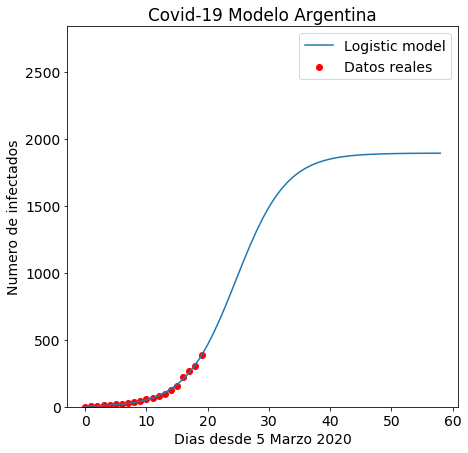

In [13]:
pred_x = list(range(max(x),sol))
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(x,y,label="Datos reales",color="red")
# Predicted logistic curve
plt.plot(x+pred_x, [logistic_model(i,fit[0][0],fit[0][1],fit[0][2]) for i in x+pred_x], label="Logistic model" )
plt.legend()
plt.xlabel("Dias desde 5 Marzo 2020")
plt.ylabel("Numero de infectados")
plt.ylim(0, c*1.5)
plt.title("Covid-19 Modelo Argentina")
plt.show()

In [14]:
from datetime import timedelta, date
final = datetime.strptime("2020-03-05 00:00:00", FMT) + timedelta(days=sol)
final.strftime('End of pandemic predicted at: %d, %b %Y')

'End of pandemic predicted at: 03, May 2020'